In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Some helper functions

def plot_my_gaussian(x,px):
  """
  This function plots a Gaussian distribution

  Inputs : x (numpy array) along which we want to represent the distribution
           px(numpy array) values taken by the distribution
  """

  fig, ax=plt.subplots()
  ax.plot(x,px,'C1',LineWidth=2,label='Estimated state')
  ax.axvline(x[px.argmax()],label='Latent state')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Value')

  return ax

# LGBIO 2060 - Exercise session 1
# Sequential probability ratio test and urgency gating

Contents : 

# Part 1 : Gaussian distribution - Inferring the world through sensitive input
When we try to estimate the exact position of our gaze or limb based on  sensory inputs (vision, proprioception), we always end up with an erroneous estimate. This means that, even though we have perfectly working sensory inputs, they are influenced by noise and therefore the inferred latent state will be a noisy approximation of the real latent state. For example, if the exact position of the tip of your fingernail in a given cartesian space is $[2 cm, 3cm]$, you might end up with an estimate which is $[1.95 cm, 3.07 cm]$ when you rely on sensory input to find it.


The noisy observation of the latent state can be modelled by a Gaussian distribution whose mean is the value of the latent state and whose variance characterises the amount of noise present in the system. We can therefore write that the observation $y$ of the state $\mu$ is such that :



$$
y\sim\mathcal{N}\left(\mu,\, \sigma^2\right)
$$




As a reminder, au Gaussian distribution is characterised by the following equation :


$$\mathcal{N}\left(\mu,\sigma^2\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\left(x-\mu\right)^2}{2\sigma^2}\right)$$

**Exercise 1**

Implement a function that creates a gaussian distribution given its parameters and the *x* vector whose signature is given below


Text(0, 0.5, 'Probability')

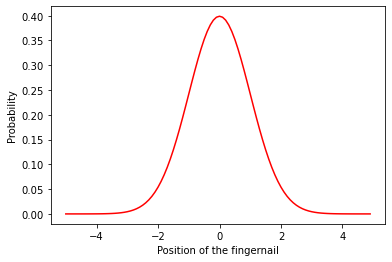

In [4]:
def my_gaussian(x_vector,mu,sigma):
  """
  This function computes the Gaussian  distribution of parameters mu and sigma 
  over the set x_vector
  
  Inputs :
    x_vector is the set over which we want to evaluate the distribution
    mu is the mean value of the distribution
    sigma is the standard deviation of the distribution

  Outputs : 
    px is a numpy array that contains the value of the distribution evaluated at 
    every points of the set x_vector
  """
  px = 1/(np.sqrt(2*np.pi*sigma**2)) *np.exp((-(x_vector-mu)**2)/(2*sigma**2))
  ###################################
  ####  Insert your code here  ###
  ####                            ###
  # raise NotImplementedError("`my_gaussian` is incomplete")
  ###################################

  return px

# Test your function on a gaussian of mean 0, variance 1 that you compute over
# the set [-5,5]. Create a graphical representation of your distribution

x_vector = np.arange(-5,5,0.1)
px = my_gaussian(x_vector,0,1)

fig, ax=plt.subplots()
ax.plot(x_vector,px,'r')
ax.set_xlabel("Position of the fingernail")
ax.set_ylabel("Probability")

Use the widget herebelow to investigate the impact of the mean and standard deviation on the shape of the gaussian distribution. 


**Make sure to execute the cell before playing with the widget**

In [5]:
#@title
#@markdown Make sure you execute this cell to enable the widget

x = np.arange(-10,11,0.1)

import ipywidgets as widgets

def refresh(mu=1,sigma=1):
  gaussian = my_gaussian(x_vector,mu,sigma)

  ax = plot_my_gaussian(x_vector,gaussian)
  plt.show()

style = {'description_width' : 'initial'}

_ = widgets.interact(refresh,
    mu = widgets.FloatSlider(value=2, min=-10, max=10, steps=0.5, description="mu:", style = style),
    sigma = widgets.FloatSlider(value=0.5, min=0.5, max=10, steps=0.5, description="sigma",style=style),
)

interactive(children=(FloatSlider(value=2.0, description='mu:', max=10.0, min=-10.0, style=SliderStyle(descrip…

# Part 2 : Sequential probability ratio test (SPRT) - Decision making

Humans and animals are able to make decisions when they face a binary alternative. In this section, we will model decision making using sequential probability ratio test (SPRT). This model can be used in a random dot motion task (see [here](https://www.youtube.com/watch?v=oDxcyTn-0os) for an example). In this paradigm, a patch of points moving on average either to the left or to the right is shown to the subject that has to determine the direction of movement. Subject's goal is to determine the direction of the moving dots. The difficulty of the task depends on the coherence of each individual point.


In this tutorial, we consider a simplified version of the random dot motion task. On each trial $i$, the subject is shown a single dot moving at velocity $v_i$ generated by a fixed probability distribution, which we know to be either: 


$$
\\
\begin{eqnarray}
p_L &=& \mathcal{N}\left(-1,\sigma^2\right)\\
&& \textrm{or}\\
p_R &=& \mathcal{N}\left(+1,\sigma^2\right)\\
\end{eqnarray}
$$

This means that the dot is moving leftward or rightward and that its speed is normally distributed around $|1|$. We want to determine which distribution amongst $p_L$ and $p_R$ is the true data generating distribution. In order to do that, we will define two alternative hypotheses, the first one $H_L$ states that $p_L$ is the data generating distribution while $H_R$ states that it is $p_R$. The decision process is based on the time-evolution of the log likelihood ratio between these two hypotheses. For both hypothesis, we will define the likelihood function that will quantify how probable it is that the data point $x_i$ comes from a given distribution. For a given occurence of the point $x_i$, the two likelihood functions will be defined by $p_L\left(x_i|z=0\right)$ and $p_R\left(x_i|z=1\right)$, which are two gaussian distributions.


Using the following gaussian observations models

$$\begin{eqnarray}
p_L\left(x|z=0\right) & = & \mathcal{N}\left(\mu_L,\sigma_L^2\right)\\
p_R\left(x|z=1\right) & = & \mathcal{N}\left(\mu_R,\sigma_R^2\right)\\
\end{eqnarray}
$$

and the definition of the log-likelihood ratio

**Compute the expression of $\log \Lambda_i$, the log-likelihood ratio at iteration $i$** 

[Click here for solution](tospoiler.com)


Without loss of generality, let's further assume the true data generating distribution is $p_R$. In this case $x_i$ can be expressed as $x_i = \mu_R + \sigma_R \epsilon$ where $\epsilon$ comes from a standard Gaussian. The foregoing formula can then be rewritten as
$$
\log \Lambda_i = \left( \log\dfrac{\sigma_L}{\sigma_R} + 0.5\dfrac{\left(\mu_R-\mu_L\right)^2}{\sigma_L^2}\right) + \left(\dfrac{\mu_L-\mu_R}{\sigma_L^2}\epsilon - 0.5\left[1-\left(\dfrac{\sigma_R}{\sigma_L}\right)^2\right]\epsilon^2\right)
$$

Where the first two constants terms serve as the drifting part and the last terms are the diffusion part. If we further let $\sigma_L = \sigma_R$, we can get rid of the quadratic term and this reduces to the classical deiscrete drift-diffusion equation where we have analytical solutions for mean and expected auto-covariance:

$$
\log \Lambda_i = 0.5\dfrac{\left(\mu_R - \mu_L\right)^2}{\sigma^2} + \dfrac{\mu_R - \mu_L}{\sigma_L^2}\epsilon, \,\,\,\,\, \text{where } \epsilon\sim\mathcal{N}\left(0,1\right)
$$

Using this very last expression, implement the function *simulate_SPRT_fixedtime* whose signature is given below.


In [20]:
def simulate_SPRT_fixedtime(sigma,stop_time,true_dist=1):
  """
  TBA
  """
  muL = -1.0
  muR = 1.0

  pL = stats.norm(loc=-1, scale = sigma)
  pR = stats.norm(loc= 1, scale = sigma)


  #Generate a random sequence of data
  if true_dist ==1:
    data = pR.rvs(size=stop_time)
  else:
    data = pL.rvs(size=stop_time)
  
  # calculate the cumulated evidence

  ll_ratio_vec = log_likelihood_ratio(data,pL,pR)

  evidence_history = np.cumsum(data,pL,pR)

  if evidence_history[-1] >0:
    decision = 1
  elif evidence_history[-1] < 0:
    decision = 0
  else:
    decision = np.random.randint(2)
  
  return evidence_history, decision, data

np.random.seed(1000)
sigma=3.5
num_sample=10
stop_time=150


#TO do codes


NameError: ignored

# Part 3 : Stopping criterions


As you have seen in the preceeding graph, the evidence builds toward a threshold corresponding to one of the two alternatives. In order to determine when to stop and to make the decision stopping criterions have to be set. If you stop taking samples too early, (e.g. making a decision after only seeing 5 samples), or there's a huge amount of observation noise that buries the signal, you are likely to be driven by observation noise to a negative cumulated log likelihood ratio and thus make a wrong decision. You could get a sens of this by increasing noise level or decreasing stopping time in the last exercise. 

Now let's look at how decision accuracy varies with the number of samples we see quantitaively. first we'll fix our observation noise levle. In this exercise you will run several repeated simulations for a certain stopping time to calculate the average decision accuracty. Accuracy is simply defined as the proportion of correct trials across our repeated simulations. 

Do this for a range of stopping times and plot the relation between average decision accuracy and stoping time. you should get a positive correlation between these two quantities



*   Choose a noise level. For example, $\sigma=3$
*   Complete the function 'simulate_accuracy_vs_stoptime' to simulate and compute corresponding average accuracies for a list of stopping times.
*   Plot accuracy versus stopping time using the pre-written codes




**Taper une démo interactive**

In [ ]:
#TODO code for students


In [ ]:
#TODO interactive demo

# Part 4 : DDM with fixed thresholds 

In this exerise, we will use thresholding as our stopping rule and observe the behavior of the DDM. 

With thresholding stopping rule, we define a desired error rate and will continue making measurements until that error is reached. Experimental evidence suggested that evidence accumulation and thresholding stopping strategy happen at neuronal level.

*     Complete the function threshold_from_errorate to calculate the evidence threshold from desired error rate $\alpha$ as described in the formulas below. The evidence thresholds $th_L$ $th_R$ for $p_L$ and $p_R$ are opposite of each other as shown below, so you can just return the absolute value.

$$
\begin{eqnarray}
th_L = \log \dfrac{\alpha}{1-\alpha} & = & -th_R\\
th_R = \log \dfrac{1-\alpha}{\alpha} & = & -th_L
\end{eqnarray}
$$
*     Complete the function simulate_SPRT_threshold to simulate an SPRT with thresholding stopping rule given noise level and desired threshold
*     Run repeated simulations for a given noise level and a desired error rate visualize the DDM traces using our previous code 

**Taper une démonstration interactive**



# Part 5 : Accuracy vs. Threshold

The faster you make a decision, the lower your accuracy often is. This phenomenon is known as the **speed/accuracy tradeoff**. Humans can make this tradeoff in a wide range of situtations as many animal species, including ants, bees, rodents, and monkeys also show similar effects.

To illustrate the speed/accuracy tradeoff under thresholding stopping rule, let's run some simulations under different thresholds and look at how average decision speed (1/length) changes with average decision accuracy. We used speed rater than accuracy because in real experiments, subjects can be incetivized to respond faster or slower, it's much harder to precisely control their deicison time or error threshold.

*     Complete the function simulate_accuracy_vs_threshold to simulate and compute accuracies vs. average decision lengths for a list of error thresholds. You will need to supply code to calculate average decision "speed" from the lengts of trials. You should also calculate the overall accuracy across these trials.

*      We've set up a list of error thresholds. Run repeated simulations and collect average accuracy with average length for each error rate in this list, and use our provided code to visualize the speed/accuracy tradeoff. You should see a positive correlation between length and accuracy.

# BONUS : Urgency gating

# **Take-home message**